In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

# Number of data points
num_points = 20

# Generate random data points
data_points = {i + 1: (random.uniform(1, 10), random.uniform(1, 10)) for i in range(num_points)}

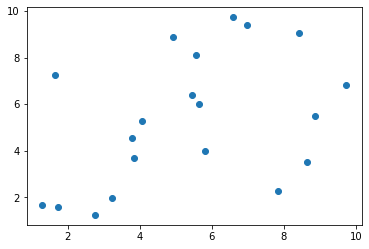

In [3]:
xs = [x for x,_ in data_points.values()]
ys = [y for _,y in data_points.values()]
plt.scatter(xs,ys)

In [4]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((float(x2) - x1)**2 + (y2 - y1)**2)
    return round(distance,2)

In [5]:
def compute_proximity_vals(data):
    n = len(data.keys())
    points = list(data.keys())
    prox_vals = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            c1, c2 = points[i], points[j]
            p1 = data[c1]
            p2 = data[c2]
            prox_vals[i][j] = euclidean_distance(p1, p2)
    return prox_vals

In [6]:
import pandas as pd

num_clusters = 0
mat = np.array(list(data_points.values()))
all_elements = list(data_points.keys())

In [7]:
p_v = compute_proximity_vals(data_points)

In [8]:
dissimilarity_matrix = pd.DataFrame(p_v,index=all_elements, columns=all_elements)

In [9]:
dissimilarity_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.00,6.78,5.54,1.51,4.13,5.75,6.45,2.57,9.64,3.59,10.02,7.03,3.01,5.69,8.76,3.52,3.98,7.01,10.26,1.97
2,6.78,0.00,1.45,7.17,4.30,4.82,4.64,4.93,5.20,3.35,6.15,4.24,6.24,2.66,4.61,7.20,4.73,7.92,6.58,7.55
3,5.54,1.45,0.00,6.13,3.88,4.90,4.95,3.51,6.30,1.99,7.16,4.79,5.52,2.88,5.61,6.53,4.28,7.92,7.57,6.56
4,1.51,7.17,6.13,0.00,3.66,5.03,5.79,3.78,9.18,4.36,9.40,6.49,1.91,5.54,8.30,2.12,3.38,5.73,9.59,0.51
5,4.13,4.30,3.88,3.66,0.00,1.73,2.35,4.17,5.56,3.26,5.89,2.91,2.11,2.00,4.68,2.97,0.43,4.19,6.14,3.85
6,5.75,4.82,4.90,5.03,1.73,0.00,0.79,5.87,4.25,4.80,4.38,1.60,3.18,2.16,3.41,3.68,1.77,3.10,4.57,5.10
7,6.45,4.64,4.95,5.79,2.35,0.79,0.00,6.36,3.46,5.16,3.61,0.84,3.96,2.08,2.63,4.46,2.47,3.44,3.82,5.88
8,2.57,4.93,3.51,3.78,4.17,5.87,6.36,0.00,8.95,1.61,9.57,6.66,4.36,4.86,8.11,5.24,4.30,8.09,9.90,4.29
9,9.64,5.20,6.30,9.18,5.56,4.25,3.46,8.95,0.00,7.44,1.07,2.70,7.40,4.10,0.88,7.92,5.80,6.09,1.52,9.31
10,3.59,3.35,1.99,4.36,3.26,4.80,5.16,1.61,7.44,0.00,8.13,5.32,4.21,3.41,6.63,5.21,3.52,7.43,8.48,4.83


In [10]:
def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if(dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value > 0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index

In [11]:
current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
2 [[1, 3, 4, 5, 8, 10, 13, 16, 17, 20], [19, 11, 9, 15, 12, 7, 6, 18, 14, 2]]
3 [[1, 3, 4, 5, 8, 10, 13, 16, 17, 20], [19, 11, 9, 15, 12, 7, 6, 18], [2, 14]]
4 [[19, 11, 9, 15, 12, 7, 6, 18], [2, 14], [1, 4, 5, 13, 16, 17, 20], [3, 10, 8]]
5 [[2, 14], [1, 4, 5, 13, 16, 17, 20], [3, 10, 8], [19, 11, 9, 15], [18, 6, 7, 12]]
6 [[2, 14], [1, 4, 5, 13, 16, 17, 20], [3, 10, 8], [19, 11, 9, 15], [6, 7, 12], [18]]
7 [[2, 14], [3, 10, 8], [19, 11, 9, 15], [6, 7, 12], [18], [5, 13, 16, 17], [1, 4, 20]]
8 [[2, 14], [19, 11, 9, 15], [6, 7, 12], [18], [5, 13, 16, 17], [1, 4, 20], [10, 8], [3]]
9 [[2, 14], [19, 11, 9, 15], [6, 7, 12], [18], [1, 4, 20], [10, 8], [3], [5, 17], [16, 13]]
10 [[19, 11, 9, 15], [6, 7, 12], [18], [1, 4, 20], [10, 8], [3], [5, 17], [16, 13], [14], [2]]
11 [[6, 7, 12], [18], [1, 4, 20], [10, 8], [3], [5, 17], [16, 13], [14], [2], [19, 11], [15, 9]]
12 [[6, 7, 12], [18], [10, 8], [3], [5, 17], [16, 13